# Dataset 2 Analysis and Experimants

In [1]:
import warnings
warnings.filterwarnings("ignore") # because warnings are annoying

### Importing the Data

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

images_normal_folder = 'dataset2/NORMAL'
images_bacterial_pnuemonia_folder = 'dataset2/BACTERIAPneumonia'
images_viral_pnuemonia_folder = 'dataset2/VIRALPneumonia'

# https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
# function from @derricw, May 2015
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), 0) # adding 0 makes the images grey scale
        img = cv2.resize(img, (50, 50), interpolation= cv2.INTER_LINEAR)
        img = np.hstack(img)
        if img is not None:
            images.append(img)
    return images

colnames = list(range(2500))

# normal images
images_normal = load_images_from_folder(images_normal_folder)
images_normal_data = pd.DataFrame(images_normal, columns=colnames)
images_normal_data['Class'] = 0

# bacterial pnuemonia images
images_bacterial_pnuemonia = load_images_from_folder(images_bacterial_pnuemonia_folder)
images_bacterial_pnuemonia_data = pd.DataFrame(images_bacterial_pnuemonia, columns=colnames)
images_bacterial_pnuemonia_data['Class'] = 1

# viral pnuemonia images
images_viral_pnuemonia = load_images_from_folder(images_viral_pnuemonia_folder)
images_viral_pnuemonia_data = pd.DataFrame(images_viral_pnuemonia, columns=colnames)
images_viral_pnuemonia_data['Class'] = 2

# make dataset with 2 classes, pnuemonia or normal
data1 = images_bacterial_pnuemonia_data.append(images_viral_pnuemonia_data)
data1['Class'] = 1
data1 = data1.append(images_normal_data)

# make dataset for detecting viral or bacterial
images_viral_pnuemonia_data['Class'] = 0
data2 = images_bacterial_pnuemonia_data.append(images_viral_pnuemonia_data)


In [3]:
# making testing and training sets
X = data1.iloc[:,:-1].values
y = data1.iloc[:, -1].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

X2 = data2.iloc[:,:-1].values
y2 = data2.iloc[:, -1].values
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

In [4]:
algorithms = []
accs = []
accs_bacterial_viral = []

### Expeperiment 1: Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

              precision    recall  f1-score   support

           0      0.942     0.890     0.915       291
           1      0.958     0.979     0.968       753

    accuracy                          0.954      1044
   macro avg      0.950     0.934     0.942      1044
weighted avg      0.954     0.954     0.954      1044


Confusion Matrix:


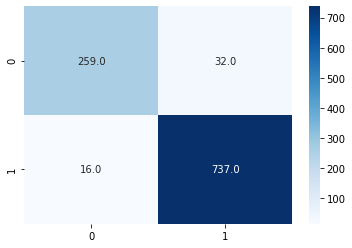

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Logistic Regression")
accs.append(ac)

In [7]:
lr2 = LogisticRegression()
lr2.fit(Xtrain2, ytrain2)
ypred2 = lr.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.600     0.011     0.022       267
           1      0.657     0.996     0.792       508

    accuracy                          0.657       775
   macro avg      0.629     0.504     0.407       775
weighted avg      0.637     0.657     0.527       775


Confusion Matrix:


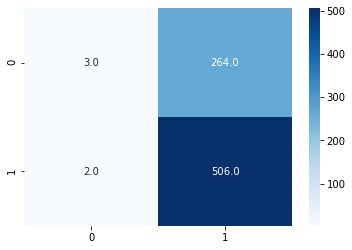

In [8]:
ac2 = accuracy_score(ytest2, ypred2) 
report2 = metrics.classification_report(ytest2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 2: Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
rng = np.random.RandomState(1)
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(Xtrain, ytrain)
ypred = dt.predict(Xtest)

              precision    recall  f1-score   support

           0      0.709     0.478     0.571       291
           1      0.821     0.924     0.869       753

    accuracy                          0.800      1044
   macro avg      0.765     0.701     0.720      1044
weighted avg      0.790     0.800     0.786      1044


Confusion Matrix:


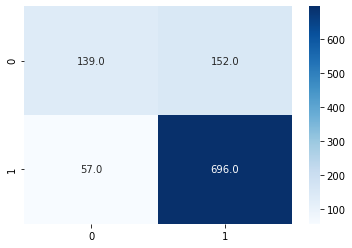

In [10]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Decision Tree")
accs.append(ac)

In [11]:
dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(Xtrain2, ytrain2)
ypred2 = dt.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.408     0.075     0.127       267
           1      0.660     0.943     0.776       508

    accuracy                          0.644       775
   macro avg      0.534     0.509     0.451       775
weighted avg      0.573     0.644     0.552       775


Confusion Matrix:


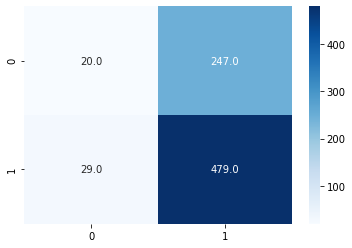

In [12]:
ac2 = accuracy_score(ytest2, ypred2) 
report2 = metrics.classification_report(ytest2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 3: Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVR
rng = np.random.RandomState(1)
svr = SVR()
svr.fit(Xtrain, ytrain)
ypred = svr.predict(Xtest)

              precision    recall  f1-score   support

           0      0.951     0.928     0.939       291
           1      0.972     0.981     0.977       753

    accuracy                          0.966      1044
   macro avg      0.962     0.955     0.958      1044
weighted avg      0.966     0.966     0.966      1044


Confusion Matrix:


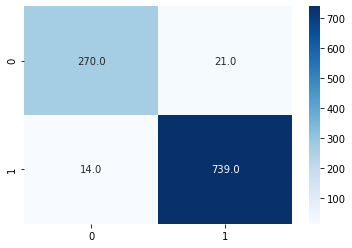

In [14]:
# ac = accuracy_score(ytest, np.round(abs(ypred)), normalize=False)
report = metrics.classification_report(ytest, np.round(abs(ypred)), digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, np.round(abs(ypred)))
ac = np.trace(cm) / np.sum(cm)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("SVM")
accs.append(ac)

In [15]:
svr2 = SVR()
svr2.fit(Xtrain2, ytrain2)
ypred2 = svr.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.455     0.019     0.036       267
           1      0.657     0.988     0.789       508

    accuracy                          0.654       775
   macro avg      0.556     0.503     0.413       775
weighted avg      0.587     0.654     0.530       775


Confusion Matrix:


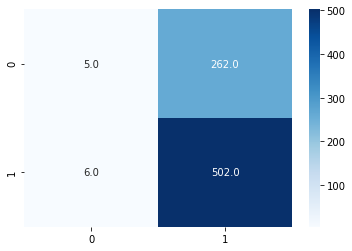

In [16]:
ac2 = accuracy_score(ytest2, np.round(abs(ypred2)), normalize=False)
report2 = metrics.classification_report(ytest2, np.round(abs(ypred2)), digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, np.round(abs(ypred2)))
ac2 = np.trace(cm2) / np.sum(cm2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 4: Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)

              precision    recall  f1-score   support

           0      0.706     0.859     0.775       291
           1      0.941     0.862     0.900       753

    accuracy                          0.861      1044
   macro avg      0.823     0.860     0.837      1044
weighted avg      0.875     0.861     0.865      1044


Confusion Matrix:


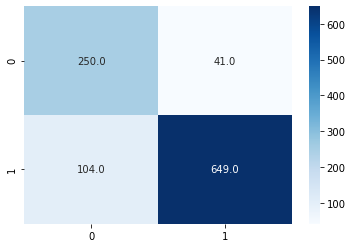

In [18]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Naive Bayes")
accs.append(ac)

In [19]:
classifier2 = GaussianNB()
classifier2.fit(Xtrain2, ytrain2)
ypred2 = classifier.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.595     0.281     0.382       267
           1      0.704     0.900     0.790       508

    accuracy                          0.686       775
   macro avg      0.650     0.590     0.586       775
weighted avg      0.667     0.686     0.649       775


Confusion Matrix:


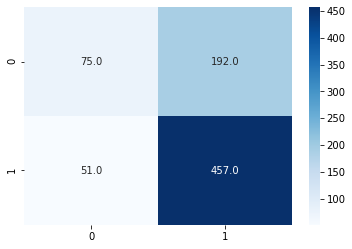

In [20]:
ac2 = accuracy_score(ytest2, ypred2) 
report2 = metrics.classification_report(ytest2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 5: K-Nearest Neighbour (kNN)

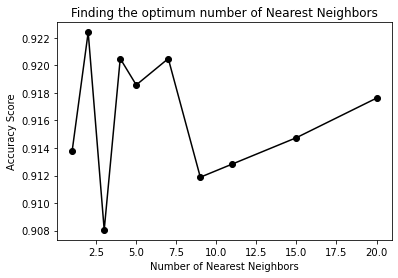

In [21]:
from sklearn.neighbors import KNeighborsClassifier
nn_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20]
accuracys = []
for k in nn_numbers:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtrain, ytrain)
    ypred = knn.predict(Xtest)
    cm = confusion_matrix(ytest, ypred)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(nn_numbers, accuracys, '-ok')
plt.xlabel("Number of Nearest Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Nearest Neighbors")
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

              precision    recall  f1-score   support

           0      0.852     0.873     0.862       291
           1      0.950     0.942     0.946       753

    accuracy                          0.922      1044
   macro avg      0.901     0.907     0.904      1044
weighted avg      0.923     0.922     0.923      1044


Confusion Matrix:


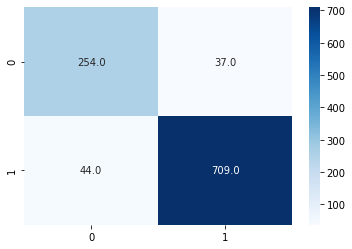

In [23]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("kNN")
accs.append(ac)

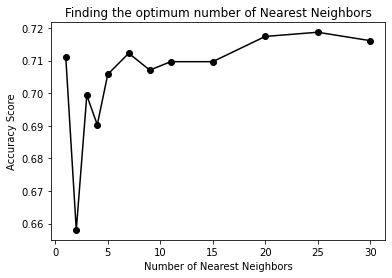

In [24]:
nn_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20, 25, 30]
accuracys = []
for k in nn_numbers:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtrain2, ytrain2)
    ypred2 = knn.predict(Xtest2)
    cm = confusion_matrix(ytest2, ypred2)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(nn_numbers, accuracys, '-ok')
plt.xlabel("Number of Nearest Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Nearest Neighbors")
plt.show()

In [25]:
knn2 = KNeighborsClassifier(n_neighbors = 25)
knn2.fit(Xtrain2, ytrain2)
ypred2 = knn.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.630     0.427     0.509       267
           1      0.742     0.868     0.800       508

    accuracy                          0.716       775
   macro avg      0.686     0.648     0.655       775
weighted avg      0.704     0.716     0.700       775


Confusion Matrix:


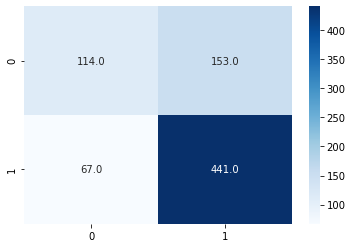

In [26]:
ac2 = accuracy_score(ytest2, ypred2) 
report2 = metrics.classification_report(ytest2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 6: K-Means

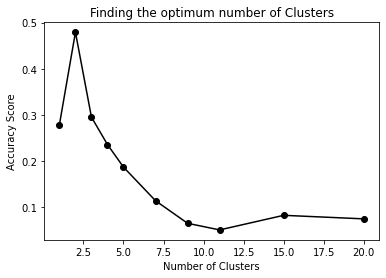

In [27]:
from sklearn.cluster import KMeans
k_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20]
accuracys = []
for k in k_numbers:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(Xtrain, ytrain)
    ypred = kmeans.predict(Xtest)
    cm = confusion_matrix(ytest, ypred)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(k_numbers, accuracys, '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Clusters")
plt.show()

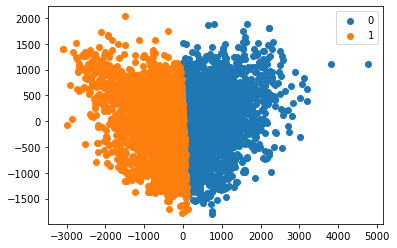

In [28]:
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(Xtrain)
kmeans = KMeans(n_clusters = 2)
label = kmeans.fit_predict(df)
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0      0.260     0.501     0.342      1050
           1      0.756     0.521     0.617      3122

    accuracy                          0.516      4172
   macro avg      0.508     0.511     0.480      4172
weighted avg      0.631     0.516     0.548      4172


Confusion Matrix:


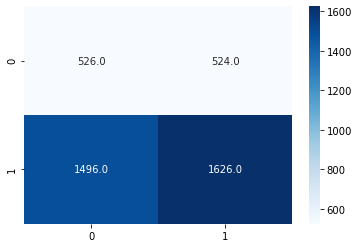

In [29]:
ypred = label
ac = accuracy_score(ytrain, ypred) 
report = metrics.classification_report(ytrain, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("K-Means")
accs.append(ac)

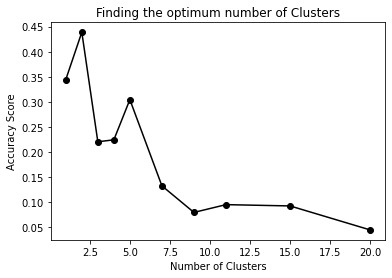

In [30]:
k_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20]
accuracys = []
for k in k_numbers:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(Xtrain2, ytrain2)
    ypred2 = kmeans.predict(Xtest2)
    cm = confusion_matrix(ytest2, ypred2)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(k_numbers, accuracys, '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Clusters")
plt.show()

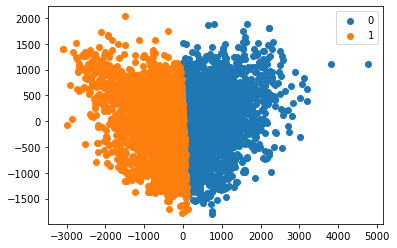

In [31]:
df2 = pca.fit_transform(Xtrain2)
kmeans2 = KMeans(n_clusters = 2)
label2 = kmeans2.fit_predict(df2)
u_labels2 = np.unique(label2)
#plotting the results:
for i in u_labels2:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0      0.406     0.580     0.478      1078
           1      0.710     0.548     0.619      2022

    accuracy                          0.559      3100
   macro avg      0.558     0.564     0.548      3100
weighted avg      0.604     0.559     0.570      3100


Confusion Matrix:


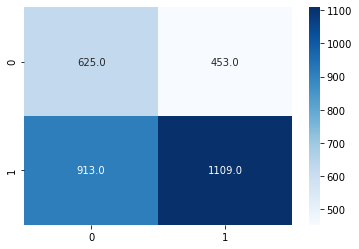

In [32]:
ypred2 = label2
ac2 = accuracy_score(ytrain2, ypred2) 
report2 = metrics.classification_report(ytrain2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytrain2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 7: Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.929     0.495     0.646       291
           1      0.835     0.985     0.904       753

    accuracy                          0.849      1044
   macro avg      0.882     0.740     0.775      1044
weighted avg      0.861     0.849     0.832      1044


Confusion Matrix:


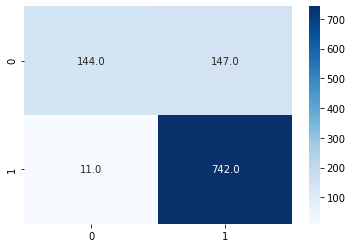

In [34]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Random Forest")
accs.append(ac)

In [35]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(Xtrain2, ytrain2)
ypred2 = clf.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.462     0.022     0.043       267
           1      0.657     0.986     0.789       508

    accuracy                          0.654       775
   macro avg      0.560     0.504     0.416       775
weighted avg      0.590     0.654     0.532       775


Confusion Matrix:


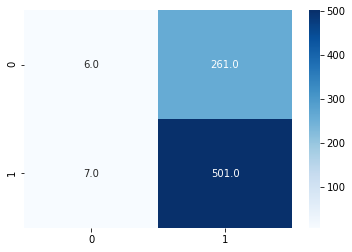

In [36]:
ac2 = accuracy_score(ytest2, ypred2) 
report2 = metrics.classification_report(ytest2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 8: Linear Discriminant Analysis (LDA)

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.819     0.777     0.797       291
           1      0.915     0.934     0.924       753

    accuracy                          0.890      1044
   macro avg      0.867     0.855     0.861      1044
weighted avg      0.888     0.890     0.889      1044


Confusion Matrix:


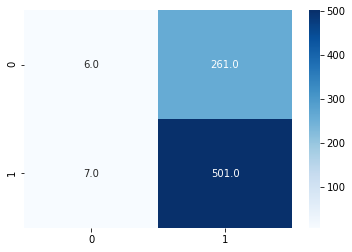

In [38]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("LDA")
accs.append(ac)

In [39]:
clf2 = LinearDiscriminantAnalysis()
clf2.fit(Xtrain2, ytrain2)
ypred2 = clf.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.154     0.007     0.014       267
           1      0.652     0.978     0.783       508

    accuracy                          0.644       775
   macro avg      0.403     0.493     0.398       775
weighted avg      0.481     0.644     0.518       775


Confusion Matrix:


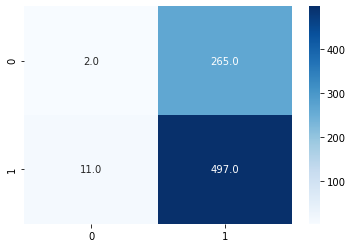

In [40]:
ac2 = accuracy_score(ytest2, ypred2) 
report2 = metrics.classification_report(ytest2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 9: Gradient Boosting Algorithm

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.898     0.821     0.858       291
           1      0.933     0.964     0.948       753

    accuracy                          0.924      1044
   macro avg      0.916     0.893     0.903      1044
weighted avg      0.923     0.924     0.923      1044


Confusion Matrix:


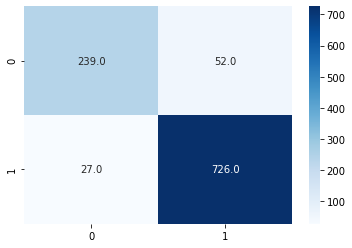

In [42]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Gradient Boosting Algorithm")
accs.append(ac)

In [43]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf2.fit(Xtrain2, ytrain2)
ypred2 = clf.predict(Xtest2)

              precision    recall  f1-score   support

           0      0.545     0.022     0.043       267
           1      0.658     0.990     0.791       508

    accuracy                          0.657       775
   macro avg      0.602     0.506     0.417       775
weighted avg      0.619     0.657     0.533       775


Confusion Matrix:


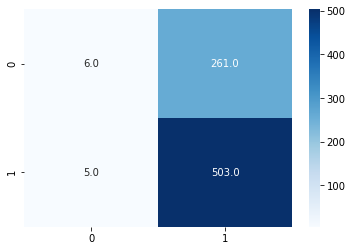

In [44]:
ac2 = accuracy_score(ytest2, ypred2) 
report2 = metrics.classification_report(ytest2, ypred2, digits=3)
print(report2)
print()
print("Confusion Matrix:")
cm2 = confusion_matrix(ytest2, ypred2)
plt.figure(figsize=(6, 4))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt=".1f")
accs_bacterial_viral.append(ac2)

### Experiment 10: Convolutional Neural Network (CNN)

Array dimensions before reshaping
(4172, 2500)
(1044, 2500)

Array dimensions after reshaping
(4172, 50, 50)
(1044, 50, 50)


Array dimensions before reshaping
(3100, 2500)
(775, 2500)

Array dimensions after reshaping
(3100, 50, 50)
(775, 50, 50)


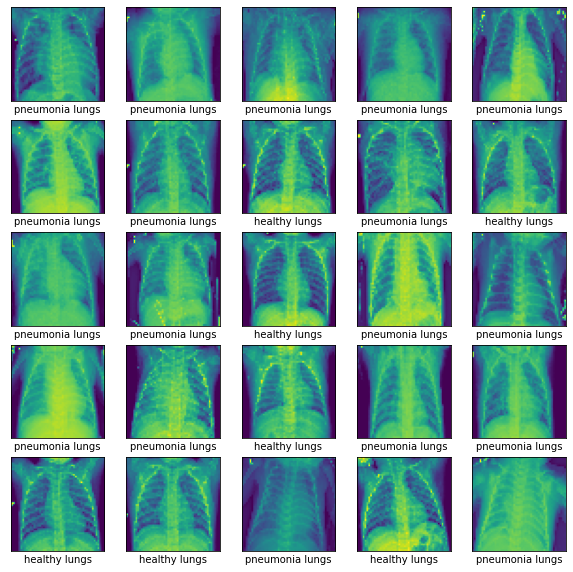

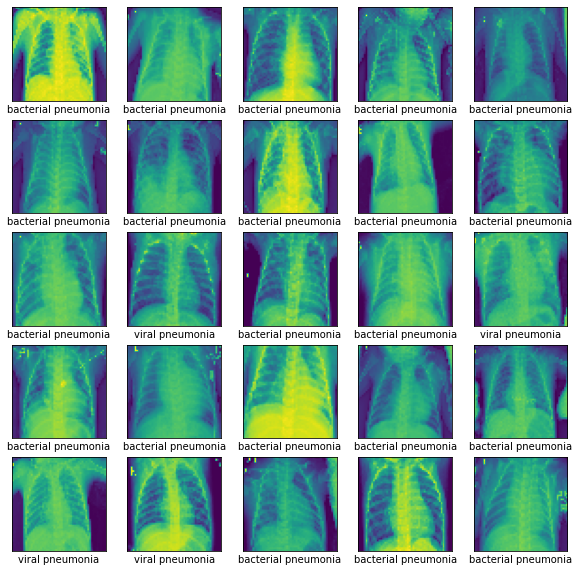

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
label_text = ["healthy lungs", "pneumonia lungs"]
label_text2 = ["viral pneumonia", "bacterial pneumonia"]
print("Array dimensions before reshaping")
print(Xtrain.shape) 
print(Xtest.shape)
Xtrain = Xtrain.reshape(4172, 50, 50) 
Xtest = Xtest.reshape(1044, 50, 50)
print()
print("Array dimensions after reshaping")
print(Xtrain.shape) 
print(Xtest.shape)
print()
print()
print("Array dimensions before reshaping")
print(Xtrain2.shape) 
print(Xtest2.shape)
Xtrain2 = Xtrain2.reshape(3100, 50, 50) 
Xtest2 = Xtest2.reshape(775, 50, 50)
print()
print("Array dimensions after reshaping")
print(Xtrain2.shape) 
print(Xtest2.shape)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i])
    plt.xlabel(label_text[ytrain[i]])
plt.show()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain2[i])
    plt.xlabel(label_text2[ytrain2[i]])
plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(50, (5,5), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (5,5), activation='relu'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 50)        1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 100)         250100    
                                                                 
Total params: 376,500
Trainable params: 376,500
Non-trai

In [48]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 50)        1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 100)         250100    
                                                                 
 flatten (Flatten)           (None, 2500)              0

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, epochs=10, 
                    validation_data=(Xtest, ytest))

Epoch 1/10
131/131 [==============================] - 20s 153ms/step - loss: 1.4269 - accuracy: 0.8394 - val_loss: 0.1940 - val_accuracy: 0.9272
Epoch 2/10
131/131 [==============================] - 19s 148ms/step - loss: 0.1586 - accuracy: 0.9391 - val_loss: 0.1315 - val_accuracy: 0.9511
Epoch 3/10
131/131 [==============================] - 19s 149ms/step - loss: 0.1012 - accuracy: 0.9612 - val_loss: 0.1461 - val_accuracy: 0.9444
Epoch 4/10
131/131 [==============================] - 20s 151ms/step - loss: 0.0961 - accuracy: 0.9628 - val_loss: 0.1910 - val_accuracy: 0.9349
Epoch 5/10
131/131 [==============================] - 19s 149ms/step - loss: 0.2113 - accuracy: 0.9427 - val_loss: 0.6831 - val_accuracy: 0.7222
Epoch 6/10
131/131 [==============================] - 20s 150ms/step - loss: 0.2569 - accuracy: 0.9192 - val_loss: 0.1750 - val_accuracy: 0.9358
Epoch 7/10
131/131 [==============================] - 20s 151ms/step - loss: 0.1098 - accuracy: 0.9576 - val_loss: 0.1589 - val_ac

33/33 - 1s - loss: 0.1425 - accuracy: 0.9502 - 1s/epoch - 37ms/step


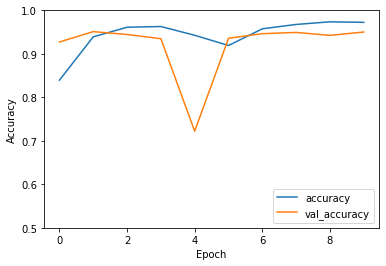

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(Xtest,  ytest, verbose=2)

In [52]:
print(test_acc)
algorithms.append("CNN")
accs.append(test_acc)

0.9501915574073792


In [53]:
history = model.fit(Xtrain2, ytrain2, epochs=10, 
                    validation_data=(Xtest2, ytest2))

Epoch 1/10
97/97 [==============================] - 15s 150ms/step - loss: 0.6576 - accuracy: 0.6884 - val_loss: 0.5893 - val_accuracy: 0.7084
Epoch 2/10
97/97 [==============================] - 15s 154ms/step - loss: 0.5726 - accuracy: 0.7219 - val_loss: 0.5954 - val_accuracy: 0.7032
Epoch 3/10
97/97 [==============================] - 15s 154ms/step - loss: 0.5741 - accuracy: 0.7213 - val_loss: 0.6063 - val_accuracy: 0.6890
Epoch 4/10
97/97 [==============================] - 14s 149ms/step - loss: 0.5461 - accuracy: 0.7316 - val_loss: 0.5895 - val_accuracy: 0.7213
Epoch 5/10
97/97 [==============================] - 14s 148ms/step - loss: 0.5273 - accuracy: 0.7461 - val_loss: 0.5899 - val_accuracy: 0.7265
Epoch 6/10
97/97 [==============================] - 15s 151ms/step - loss: 0.5154 - accuracy: 0.7539 - val_loss: 0.6064 - val_accuracy: 0.7239
Epoch 7/10
97/97 [==============================] - 15s 152ms/step - loss: 0.4899 - accuracy: 0.7616 - val_loss: 0.5929 - val_accuracy: 0.7239

25/25 - 1s - loss: 0.6909 - accuracy: 0.7252 - 834ms/epoch - 33ms/step


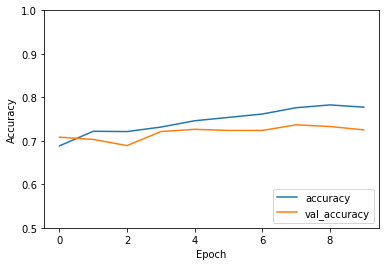

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(Xtest2,  ytest2, verbose=2)

In [55]:
print(test_acc)
accs_bacterial_viral.append(test_acc)

0.7251613140106201


### Results Analysis

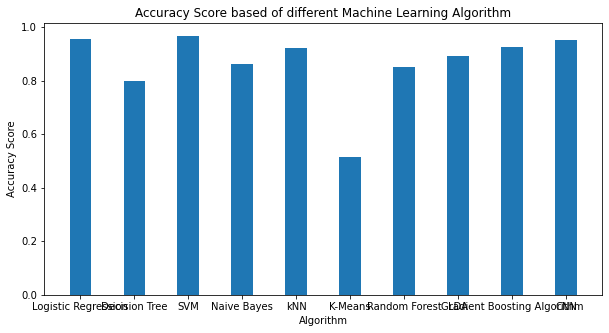

In [56]:
fig = plt.figure(figsize = (10, 5))
plt.bar(algorithms, accs, width = 0.4)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score based of different Machine Learning Algorithm")
plt.show()

In [57]:
dictionary = dict(zip(algorithms, accs))
winner = max(dictionary, key=dictionary.get)
print("Highest scoring algorithm: "+str(winner))

Highest scoring algorithm: SVM


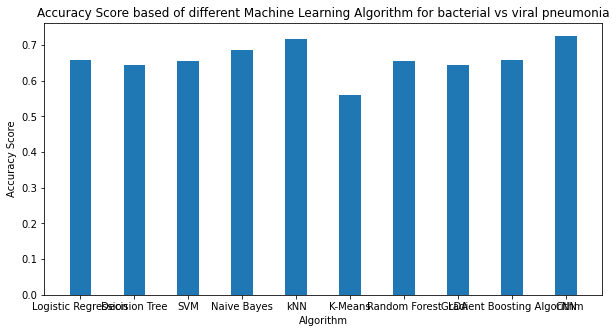

In [58]:
fig = plt.figure(figsize = (10, 5))
plt.bar(algorithms, accs_bacterial_viral, width = 0.4)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score based of different Machine Learning Algorithm for bacterial vs viral pneumonia")
plt.show()

In [59]:
dictionary2 = dict(zip(algorithms, accs_bacterial_viral))
winner2 = max(dictionary2, key=dictionary2.get)
print("Highest scoring algorithm for bacterial vs viral pneumonia: "+str(winner2))

Highest scoring algorithm for bacterial vs viral pneumonia: CNN
